In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skfeature.function.similarity_based import fisher_score
%matplotlib inline

train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

X_train = train.copy()
y_train = X_train.pop('target')
X_train.pop('name')
std = StandardScaler()
std.fit(X_train)
X_train = pd.DataFrame(std.transform(X_train), columns=X_train.columns)

In [4]:
X = X_train.to_numpy()
Y = y_train.to_numpy()

#ranks each feature from best  to worst by their index
ranks = fisher_score.fisher_score(X,Y)


#remove first 30 features
dropped_columns = ranks[30:]


#loop to drop the features
cols = train.columns
fishertrain = train.copy()
for i in range(len(dropped_columns)):
    fishertrain = fishertrain.drop(cols[dropped_columns[i]],axis = 1)

fishertrain.to_csv('dataset/fishertrain.csv',index= False)

cols = test.columns
fishertest = test.copy()
for i in range(len(dropped_columns)):
    fishertest = fishertest.drop(cols[dropped_columns[i]],axis = 1)

fishertest.to_csv('dataset/fishertest.csv',index= False)    

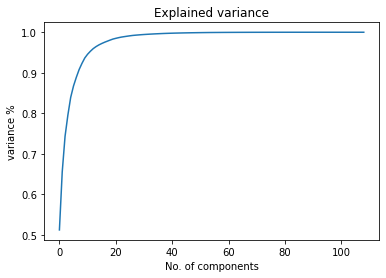

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No. of components")
plt.ylabel("variance %")
plt.title("Explained variance")
plt.show()

In [6]:
#function to drop the most correlated features with a specific threshold
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [7]:
correlation_train = train.copy()
correlation_test = test.copy()
corr_features = correlation(correlation_train, 0.7)
len(set(corr_features))

98

In [8]:
corr_features

{'90Percentile',
 'ClusterShade',
 'ClusterTendency',
 'DifferenceAverage',
 'DifferenceEntropy',
 'DifferenceVariance',
 'Energy',
 'Entropy',
 'GrayLevelNonUniformity',
 'GrayLevelNonUniformityNormalized',
 'GrayLevelVariance',
 'HighGrayLevelRunEmphasis',
 'Id',
 'Idm',
 'Idn',
 'Imc1',
 'Imc2',
 'InterquartileRange',
 'InverseVariance',
 'JointAverage',
 'JointEnergy',
 'JointEntropy',
 'LongRunEmphasis',
 'LongRunHighGrayLevelEmphasis',
 'LongRunLowGrayLevelEmphasis',
 'LowGrayLevelRunEmphasis',
 'MCC',
 'Maximum',
 'MaximumProbability',
 'Mean',
 'MeanAbsoluteDeviation',
 'Median',
 'Minimum',
 'Range',
 'RobustMeanAbsoluteDeviation',
 'RootMeanSquared',
 'RunEntropy',
 'RunLengthNonUniformity',
 'RunLengthNonUniformityNormalized',
 'RunPercentage',
 'RunVariance',
 'ShortRunEmphasis',
 'ShortRunHighGrayLevelEmphasis',
 'SumAverage',
 'SumEntropy',
 'SumSquares',
 'Uniformity',
 'Variance',
 'contrast_d1_0',
 'contrast_d1_135',
 'contrast_d1_45',
 'contrast_d1_90',
 'contrast_d2_

In [9]:
#correlation_train = correlation_train.drop(corr_features,axis=1)
#correlation_test = correlation_test.drop(corr_features,axis=1)
correlation_test.shape
correlation_test.to_csv('dataset/corrtest.csv' ,index= False)    
correlation_train.shape
correlation_train.to_csv('dataset/corrtrain.csv',index= False)    